In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [0]:
img = cv2.imread('road.jpg')

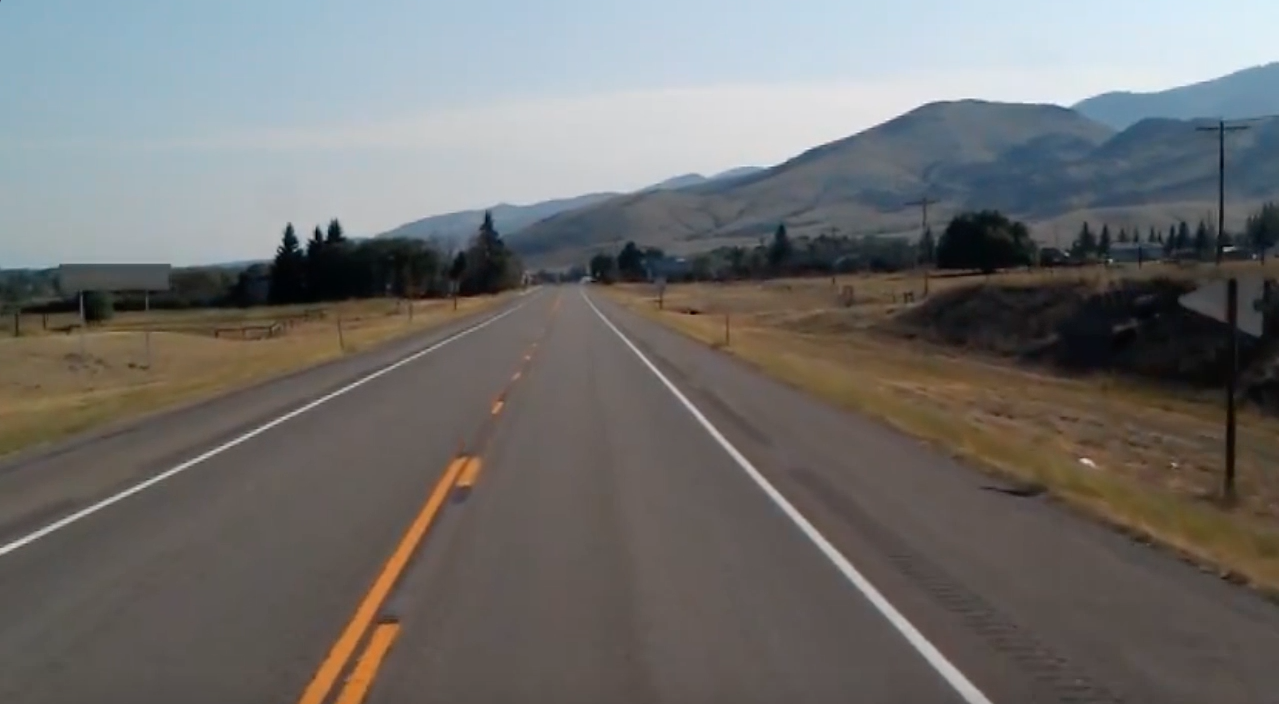

In [7]:
cv2_imshow(img)

In [8]:
img.shape

(704, 1279, 3)

In [0]:
import matplotlib.pyplot as plt

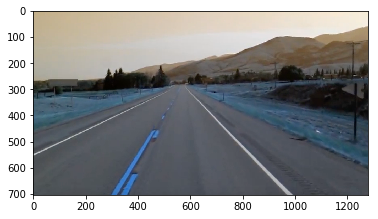

In [10]:
plt.imshow(img)

In [0]:
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

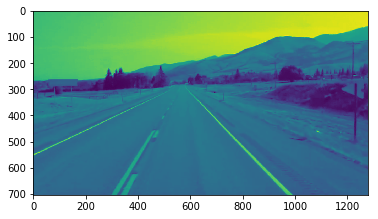

In [12]:
plt.imshow(gray_img)

In [13]:
gray_img.shape

(704, 1279)

In [0]:
gray_blur = cv2.GaussianBlur(gray_img,(5,5),0)

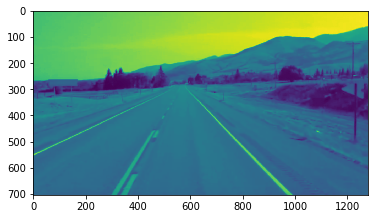

In [16]:
plt.imshow(gray_blur)

In [0]:
# edge detection
canny_img = cv2.Canny(gray_blur,50,150)

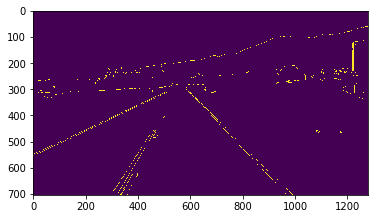

In [21]:
plt.imshow(canny_img)

# this image is going to be used letter as its gives more imformation about lanes on road
# lane co-ordinates are from this picturea is
# triangles points
# (200 , 700)----------------like(200,0)  but in this pic 0 pt is upper and 700 is down so using 700 in place of 0
# (1100,700)
# (550,250)

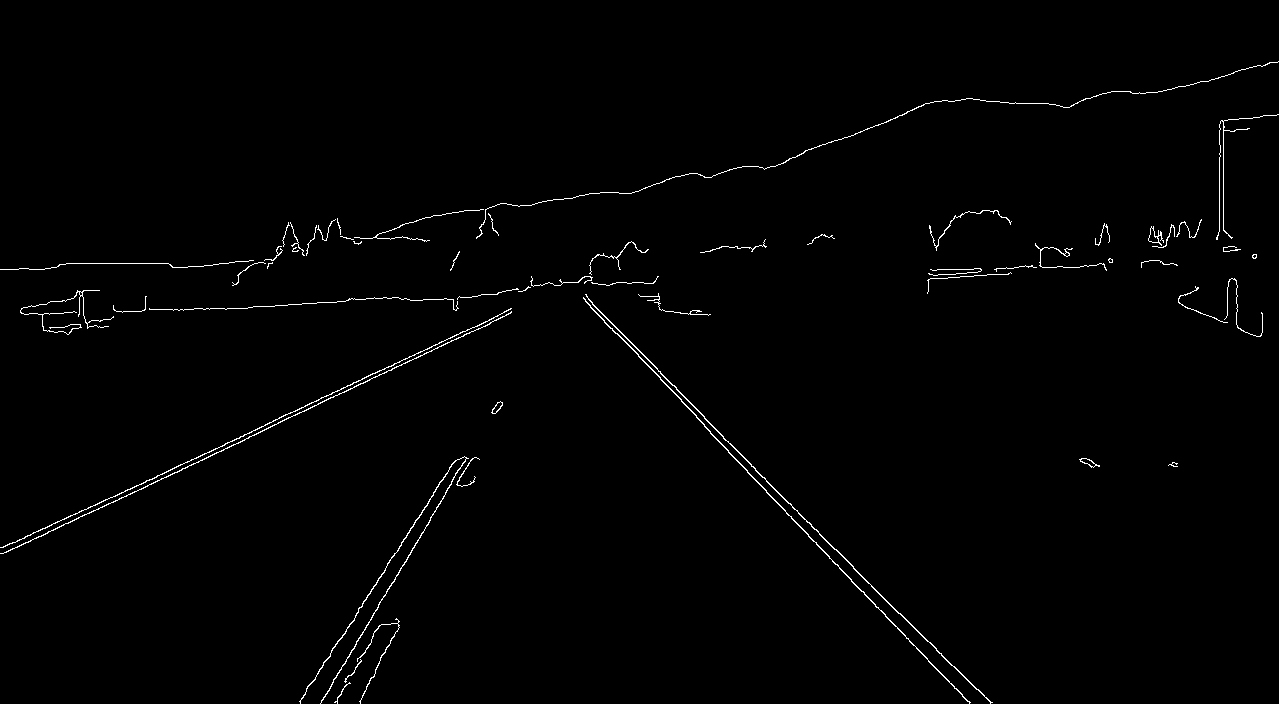

In [36]:
cv2_imshow(canny_img)

In [38]:
canny_img.shape

(704, 1279)

In [39]:
# Creating lane traingle
height = canny_img.shape[0]
height

704

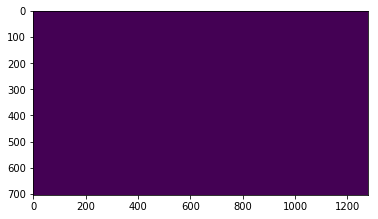

In [41]:
mask = np.zeros_like(canny_img)
plt.imshow(mask)

In [0]:
# polygens co-ordinates
polygens = np.array([[(200,height),(1100,height),(550,250)]])

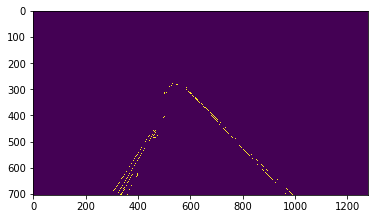

In [43]:
# this polygen denotes the lane triangle
# adding this with mask image
cv2.fillPoly(mask , polygens ,255)
#plt.imshow(lane_mask)
masked_img = cv2.bitwise_and(canny_img,mask)
plt.imshow(masked_img)

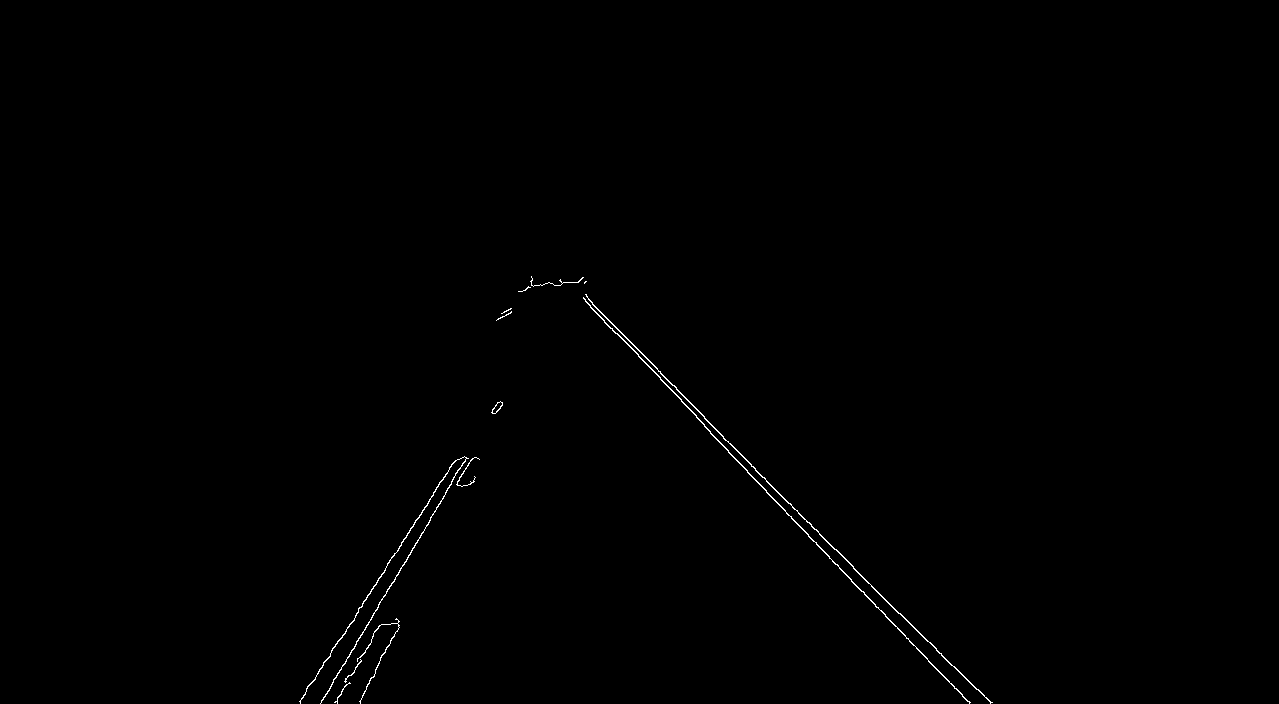

In [45]:
# above img is black
cv2_imshow(masked_img)
# this is our region of interest

In [0]:
# Draw lines on lane

In [0]:
lines = cv2.HoughLinesP(masked_img,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)

In [0]:
def disply_lines(image,lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),5)
  return line_image

In [0]:
line_image = disply_lines(img,lines)

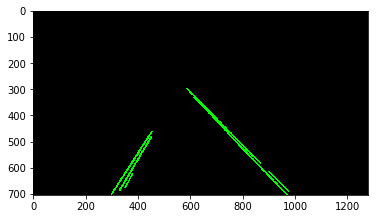

In [103]:
plt.imshow(line_image)

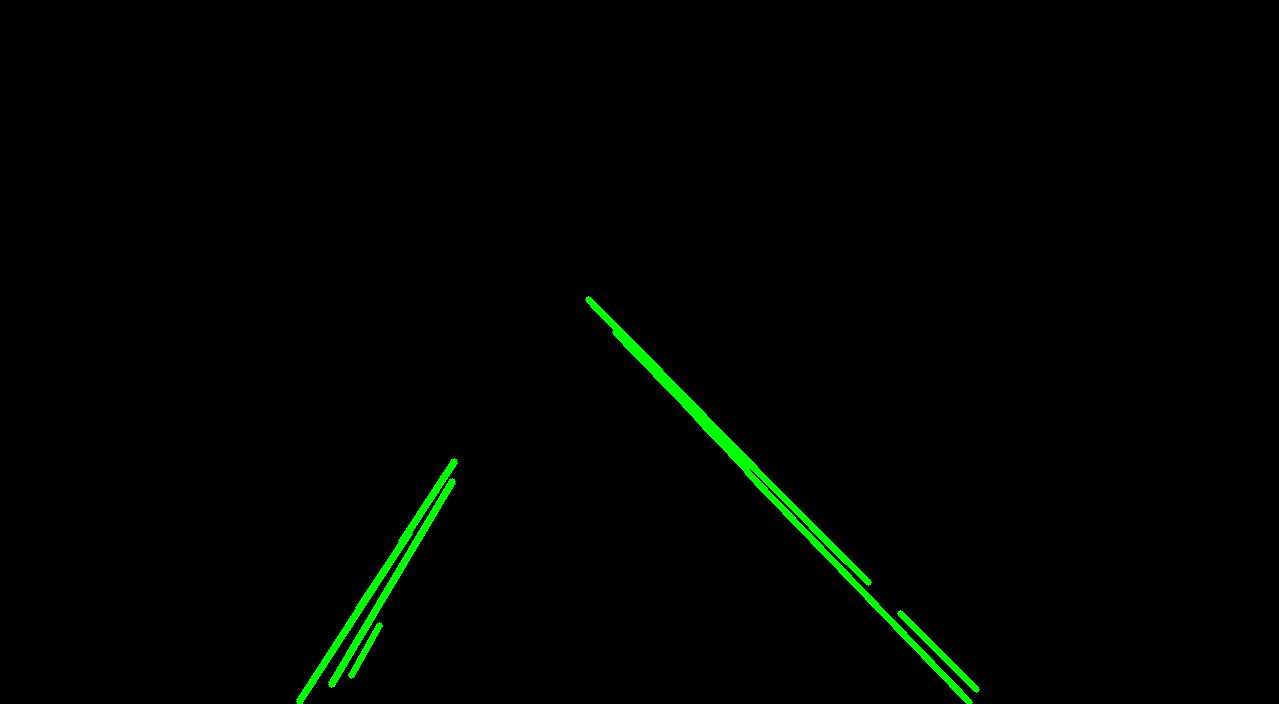

In [104]:
cv2_imshow(line_image)

In [0]:
combo_img = cv2.addWeighted(img,0.8,line_image,1,1)

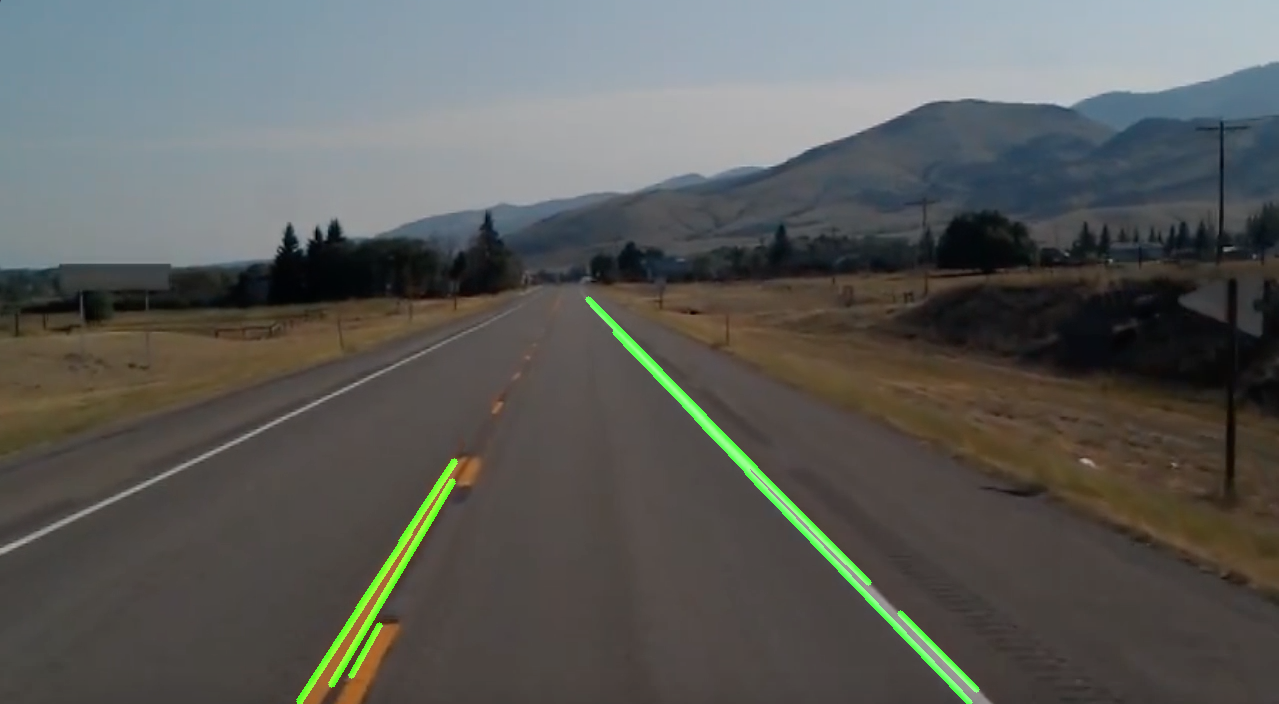

In [106]:
cv2_imshow(combo_img)